Materi Week 3 Cleaning Data with Python dengan Dataset Customer Call List_fix

1. check null values using isnull()
2. handling missing values
3. check outliers
4. handling outliers
5. check duplicates
6. remove duplicates (if necessary)
7. handling inconsistent format (standardizing values)

### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.reset_option('display.max_rows')

### Import Data

In [4]:
df = pd.read_csv(r'C:\Users\RizkyBagaskara\Documents\Code Development\Data Analyst\Gundar IO\Week 3 Data Cleaning\Customer Call List_fix.csv', sep=';')

df

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn/,NaN,542-849-7473,638 Lien Alley,Yes,No,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,No,Yes,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Yes,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,No,9
...,...,...,...,...,...,...,...,...,...,...
95,96,Ms,Sarine,NaN,NaN,523-302-9169,67630 Melby Alley,Y,N,77
96,97,Mr,Chanda,Hamberston...,Peruvian,430-834-7578,24 Mariners Cove Point,NaN,NaN,46
97,98,Mrs,Gerry,Tomblin,NaN,480-449-6672,9 Westerfield Circle,No,Y,47
98,99,Rev,Shirleen,Deller,NaN,7066950392,63777 Ramsey Avenue,Yes,Yes,54


Set maximum rows (baris) yang ditampilkan menjadi 100

In [5]:
pd.set_option('display.max_rows', 100)

Cek data

In [6]:
df.head(10)

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn/,NaN,542-849-7473,638 Lien Alley,Yes,No,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,No,Yes,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Yes,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,No,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Yes,Yes,6
6,7,Ms,Horton,McFee/,NaN,876|678|3469,800 Clarendon Center,No,No,58
7,8,Honorable,Ceciley,NaN,NaN,938-956-0025,NaN,N,No,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Yes,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Yes,No,69


In [7]:
df.tail(10)

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
90,91,Mr,Saxon,Ebertz,Yakama,601-659-4617,NaN,Yes,Y,109
91,92,Mrs,Leoine,Simmance,NaN,7066950392,593 Granby Drive,Y,N,106
92,93,Mr,Asa,Duly,Micronesian,176-313-4837,643 Delladonna Hill,Y,N,46
93,94,Honorable,Aliza,Monahan,Sioux,635-783-2169,21 Petterle Crossing,No,N,5
94,95,Honorable,Hardy,Le Fevre,Tongan,186-221-4070,0 Fremont Road,Yes,NaN,44
95,96,Ms,Sarine,NaN,NaN,523-302-9169,67630 Melby Alley,Y,N,77
96,97,Mr,Chanda,Hamberston...,Peruvian,430-834-7578,24 Mariners Cove Point,NaN,NaN,46
97,98,Mrs,Gerry,Tomblin,NaN,480-449-6672,9 Westerfield Circle,No,Y,47
98,99,Rev,Shirleen,Deller,NaN,7066950392,63777 Ramsey Avenue,Yes,Yes,54
99,100,Ms,Jonathon,Benoiton,Sioux,472-734-4262,836 Havey Lane,TRUE,FALSE,73


### Tahapan Cleaning Data

#### 1. Identifikasi

##### a. Missing/empty values

In [8]:
df.isna()

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False
7,False,False,False,True,True,False,True,False,False,False
8,False,False,False,False,False,False,True,False,True,False
9,False,False,False,False,True,False,False,False,False,False


Percentages

In [9]:
df.isna().sum() * 100 / len(df)

customer_id         0.0
salutation          0.0
first_name          0.0
last_name           9.0
race               60.0
phone_number        9.0
address            26.0
paying_customer     2.0
do_not_contact     13.0
call_duration       0.0
dtype: float64

##### b. Duplicates

In [10]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

Percentages

In [11]:
df.duplicated().sum() * 100 / len(df)

0.0

##### c. Outliers

In [12]:
df.describe()

,customer_id,call_duration
count,100.000000,100.000000
mean,50.500000,65.390000
std,29.011492,34.821883
min,1.000000,1.000000
25%,25.750000,37.750000
50%,50.500000,64.000000
75%,75.250000,96.500000
max,100.000000,120.000000


C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_4048\3845710100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['call_duration'], hist=False)


<Axes: xlabel='call_duration', ylabel='Density'>

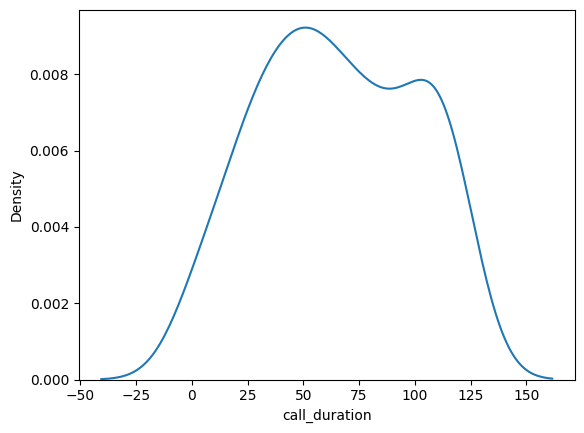

In [13]:
sns.distplot(df['call_duration'], hist=False)

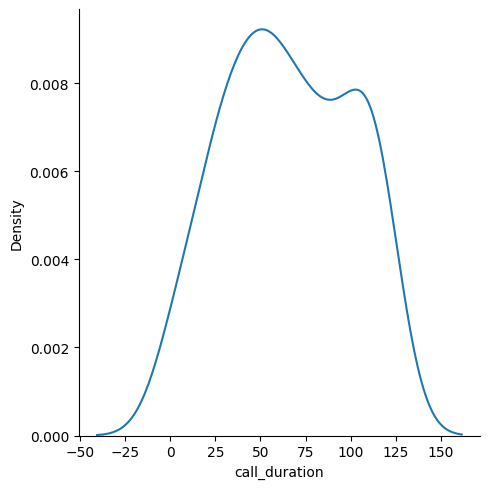

In [14]:
sns.displot(df['call_duration'], kind='kde')

<Axes: xlabel='call_duration', ylabel='Count'>

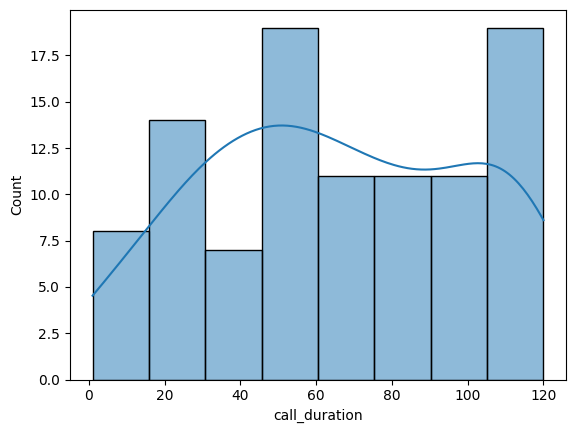

In [15]:
sns.histplot(df['call_duration'], kde=True)

Key Insights:
- Banyak first name dan last name yang namanya berantakan (ada /, ..., dll)
- Phone_number berantakan, harus disamakan formatnya menjadi 123-456-789
- Beberapa address memiliki kolom NaN, bisa ditiban dengan "No Address"
- Status paying_customer dan do_not_contact berantakan, karena harusnya Y/N, tetapi ada yang Yes,No, bahkan NaN
- Kolom salutation dan race tidak diperlukan oleh tim marketing sehingga bisa langsung di drop
- Persebaran data termasuk normal, tidak perlu dihilangkan outliernya/disamakan menggunakan median

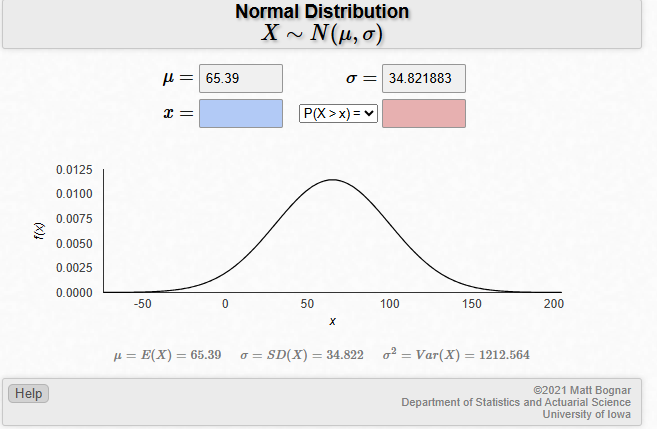

#### 2. Handling Data

##### a. Formatting Values

In [51]:
df2 = df

- last_name
        
        Terdapat ..., -, _, \, dan /

In [52]:
#method chaining in Python
df2['last_name'] = df2['last_name'].str.replace('/', '').str.replace('...', '').str.replace('_', '').str.replace('---', '')

df2

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn,NaN,542-849-7473,638 Lien Alley,Y,N,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,N,Y,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Y,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,N,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Y,Y,6
6,7,Ms,Horton,McFee,NaN,876|678|3469,800 Clarendon Center,N,N,58
7,8,Honorable,Ceciley,,NaN,938-956-0025,NaN,N,N,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Y,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Y,N,69


In [48]:
df2['last_name'].replace(np.nan, '', inplace=True)

df2

C:\Users\RizkyBagaskara\AppData\Local\Temp\ipykernel_4048\3192905129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['last_name'].replace(np.nan, '', inplace=True)


,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn,NaN,542-849-7473,638 Lien Alley,Yes,No,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,No,Yes,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Yes,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,No,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Yes,Yes,6
6,7,Ms,Horton,McFee,NaN,876|678|3469,800 Clarendon Center,No,No,58
7,8,Honorable,Ceciley,,NaN,938-956-0025,NaN,N,No,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Yes,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Yes,No,69


- paying_customer

In [54]:
df2['paying_customer'] = df2['paying_customer'].str.replace('Yes', 'Y').str.replace('No', 'N').str.replace('TRUE', 'Y').str.replace('FALSE', 'N')

df2

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn,NaN,542-849-7473,638 Lien Alley,Y,N,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,N,Y,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Y,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,N,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Y,Y,6
6,7,Ms,Horton,McFee,NaN,876|678|3469,800 Clarendon Center,N,N,58
7,8,Honorable,Ceciley,,NaN,938-956-0025,NaN,N,N,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Y,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Y,N,69


- do_not_contact

In [50]:
df2['do_not_contact'] = df2['do_not_contact'].str.replace('Yes', 'Y').str.replace('No', 'N').str.replace('TRUE', 'Y').str.replace('FALSE', 'N')

df2

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn,NaN,542-849-7473,638 Lien Alley,Y,N,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,N,Y,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Y,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,N,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Y,Y,6
6,7,Ms,Horton,McFee,NaN,876|678|3469,800 Clarendon Center,N,N,58
7,8,Honorable,Ceciley,,NaN,938-956-0025,NaN,N,N,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Y,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Y,N,69


- phone_number

      phone_number format = 123-456-789

In [55]:
df2

,customer_id,salutation,first_name,last_name,race,phone_number,address,paying_customer,do_not_contact,call_duration
0,1,Mr,Syd,Leyburn,NaN,542-849-7473,638 Lien Alley,Y,N,7
1,2,Mr,Gertrude,Vicent,NaN,362-583-2014,4436 Main Crossing,N,Y,103
2,3,Honorable,Mycah,Elldred,Puget Sound Salish,690-694-2393,NaN,N,NaN,2
3,4,Rev,Kit,Santo,NaN,123/643/9775,829 Cherokee Center,Y,Y,64
4,5,Rev,Frazer,Kingdom,Panamanian,546-864-2772,NaN,Y,N,9
5,6,Rev,Alfons,Backe,NaN,384-472-6323,7 Waxwing Lane,Y,Y,6
6,7,Ms,Horton,McFee,NaN,876|678|3469,800 Clarendon Center,N,N,58
7,8,Honorable,Ceciley,,NaN,938-956-0025,NaN,N,N,109
8,9,Rev,Alley,Bottomley,Chamorro,453-587-5698,NaN,Y,NaN,49
9,10,Ms,Jarvis,Pillman,NaN,689-947-7058,5 Orin Circle,Y,N,69


##### b. Drop Unecessary Data

In [ ]:
df2 = df.drop(columns=['salutation', 'race'])

df2